In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

Memanggil Dataset

In [ ]:
df = pd.read_csv('Depression Student Dataset Indo.csv')

Deskripsi Dataset

In [ ]:
df.head()

,Jenis kelamin,Usia,Tekanan Akademis,Kepuasan Belajar,Durasi Tidur,Kebiasaan Diet,Pernahkah Anda memiliki pikiran untuk bunuh diri?,Jam Belajar,Stres Keuangan,Riwayat Keluarga dengan Penyakit Mental,Depresi
0,Pria,28,2,4,7-8 jam,Sedang,Ya,9,2,Ya,TIDAK
1,Pria,28,4,5,5-6 jam,Sehat,Ya,7,1,Ya,TIDAK
2,Pria,25,1,3,5-6 jam,Tidak sehat,Ya,10,4,TIDAK,Ya
3,Pria,23,1,4,Lebih dari 8 jam,Tidak sehat,Ya,7,2,Ya,TIDAK
4,Perempuan,31,1,5,Lebih dari 8 jam,Sehat,Ya,4,2,Ya,TIDAK


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Jenis kelamin                                      502 non-null    object
 1   Usia                                               502 non-null    int64 
 2   Tekanan Akademis                                   502 non-null    int64 
 3   Kepuasan Belajar                                   502 non-null    int64 
 4   Durasi Tidur                                       502 non-null    object
 5   Kebiasaan Diet                                     502 non-null    object
 6   Pernahkah Anda memiliki pikiran untuk bunuh diri?  502 non-null    object
 7   Jam Belajar                                        502 non-null    int64 
 8   Stres Keuangan                                     502 non-null    int64 
 9   Riwayat Keluarga deng

<Axes: >

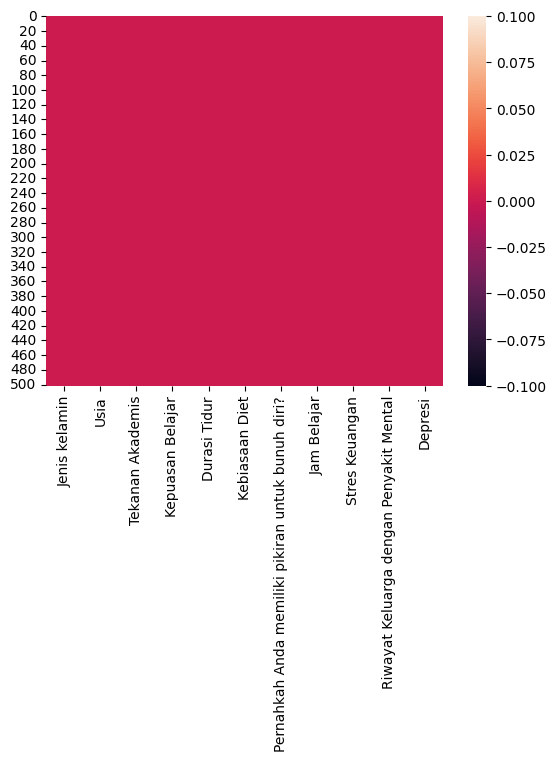

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.describe()

,Usia,Tekanan Akademis,Kepuasan Belajar,Jam Belajar,Stres Keuangan
count,502.000000,502.000000,502.000000,502.000000,502.000000
mean,26.241036,3.003984,3.075697,6.404382,2.928287
std,4.896501,1.390007,1.373490,3.742434,1.425053
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,22.000000,2.000000,2.000000,3.000000,2.000000
50%,26.500000,3.000000,3.000000,7.000000,3.000000
75%,30.000000,4.000000,4.000000,10.000000,4.000000
max,34.000000,5.000000,5.000000,12.000000,5.000000


In [ ]:
df.isna().sum()

,0
Jenis kelamin,0
Usia,0
Tekanan Akademis,0
Kepuasan Belajar,0
Durasi Tidur,0
Kebiasaan Diet,0
Pernahkah Anda memiliki pikiran untuk bunuh diri?,0
Jam Belajar,0
Stres Keuangan,0
Riwayat Keluarga dengan Penyakit Mental,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Inisialisasi LabelEncoder
le = LabelEncoder()

# Kolom-kolom kategorikal yang akan diubah
categorical_cols = ['Jenis kelamin', 'Durasi Tidur', 'Kebiasaan Diet', 'Pernahkah Anda memiliki pikiran untuk bunuh diri?', 'Riwayat Keluarga dengan Penyakit Mental']

# Melakukan label encoding untuk setiap kolom kategorikal
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Menampilkan data setelah label encoding
df.head()

,Jenis kelamin,Usia,Tekanan Akademis,Kepuasan Belajar,Durasi Tidur,Kebiasaan Diet,Pernahkah Anda memiliki pikiran untuk bunuh diri?,Jam Belajar,Stres Keuangan,Riwayat Keluarga dengan Penyakit Mental,Depresi
0,1,28,2,4,1,0,1,9,2,1,TIDAK
1,1,28,4,5,0,1,1,7,1,1,TIDAK
2,1,25,1,3,0,2,1,10,4,0,Ya
3,1,23,1,4,3,2,1,7,2,1,TIDAK
4,0,31,1,5,3,1,1,4,2,1,TIDAK


In [ ]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = df.drop('Depresi', axis=1)
y = df['Depresi']

# Bagi data menjadi training dan testing set (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)

# Menampilkan ukuran masing-masing set
print("Banyak data latih setelah dilakukan Train-Validation Split: ", len(X_train))
print("Banyak data uji setelah dilakukan Test-Validation Split: ", len(X_test))

Banyak data latih setelah dilakukan Train-Validation Split:  351
Banyak data uji setelah dilakukan Test-Validation Split:  151


In [ ]:
#Membuat Model Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay


rtf=RandomForestClassifier()
rtf.fit(X_train, y_train)
RandomForestClassifier()
y_pred=rtf.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan RF: ", score)

Akurasi dengan menggunakan RF:  0.8609271523178808


[[65  9]
 [12 65]]
              precision    recall  f1-score   support

       TIDAK       0.84      0.88      0.86        74
          Ya       0.88      0.84      0.86        77

    accuracy                           0.86       151
   macro avg       0.86      0.86      0.86       151
weighted avg       0.86      0.86      0.86       151



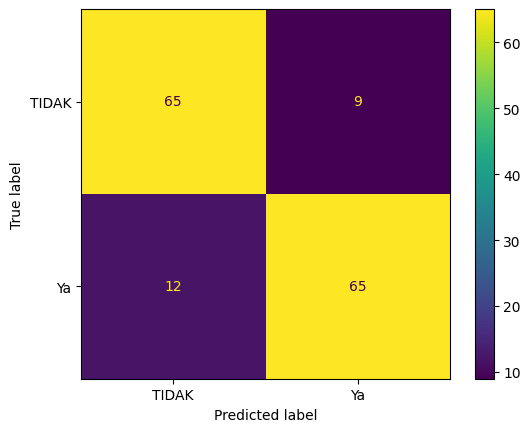

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

print (classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score
accuracy=(accuracy_score(y_test, y_pred)*100)
accuracy


#Confusion Matriks

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=rtf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rtf.classes_)
disp.plot()
plt.show()

#Jenis kelamin,Usia,Tekanan Akademis,Kepuasan Belajar,Durasi Tidur,Kebiasaan Diet,Pernahkah Anda memiliki pikiran untuk bunuh diri?,Jam Belajar,Stres Keuangan,Riwayat Keluarga dengan Penyakit Mental.

In [ ]:
input_data = np.array([[1,	28,	2,	4,	1,	0,	1,	9,	2,	1]])
prediction = rtf.predict(input_data)
print('Status :', prediction)


Status : ['TIDAK']


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
filename = 'model.pkl'
pickle.dump(rtf, open(filename, 'wb'))